<br><br><br>
<h2><font size=6>Práctica 2</font></h2>



<h1><font size=7>Naive Bayes</font></h1>

<br>
<div style="text-align: right">
<font size=4>Diego García Díaz (Diego.Garcia30@alu.uclm.es)</font><br>
<font size=4>Alberto Pérez Álvarez (Alberto.Perez25@alu.uclm.es)</font><br>
</div>

**<font color="#B30033" size=5>Estudiantes: </font>** 

* Diego García Díaz
* Alberto Pérez Álvarez 

---

<a id="introduccion"></a>
# 1. Introducción

<br>

El objetivo de esta práctica es estudiar el algoritmo [`Naive Bayes`](https://scikit-learn.org/stable/modules/naive_bayes.html) para clasificación. Para ello, se deberá:
1. Llevar a cabo un estudio de los clasificadores ya implementados de la librería `scikit-learn`. En él, se estudiará tanto la versión de Naive Bayes para variables discretas, [`CategoricalNB`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.CategoricalNB.html), como la versión Gaussiana para variables continuas, [`GaussianNB`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html). En el caso de `CategoricalNB`, además, se estudiará el efecto de la discretización de variables sobre los resultados.
2. Implementación del algoritmo Naive Bayes mixto (que pueda tratar tanto variables discretas como continuas) en Python y realización de una comparación con los utilizados de `scikit-learn`.



---

<a id="indice"></a>
<h2>Índice</h2>

* [1. Introducción](#introduccion)
* [2. Modelos Gráficos Probabilísticos](#pgm)
* [3. Naive Bayes en scikit-learn](#naive-scikit)
* [4. Implementación de Naive Bayes categórico](#implementacion)
* [5. Evaluación experimental](#evaluacion)
* [6. Trabajo opcional](#opcional)


---

<a id="pgm"></a>
# 2. Modelos Gráficos Probabilísticos

<br>

## 2.1 Clasificación probabilística

Como ya habéis visto en clase, podemos realizar una predicción de las probabilidades a posteriori de los posibles valores $\{c_1,\dots,c_k\}$ de una variable $y$ mediante el cálculo de $P(y\ |\ x_1,\dots,x_n)$, donde $x_1,\dots,x_n$ son las $n$ variables independientes usadas para estimar $y$. Una vez contamos con las probabilidades, si queremos realizar una clasificación simplemente habrá que devolver el valor $\{c_1,\dots,c_k\}$ con mayor probabilidad, es decir, $\hat{y} = arg\ max_{y \in \{c_1,\dots,c_k\}} P(y\ |\ x_1,\dots,x_n)$.


En la práctica, es imposible realizar dicho cálculo en la mayoría de ocasiones ya que aún contando con variables binarias se necesitaría crear una **Distribución de Probabilidad Conjunta (DCP)** en la que se almacene la probabilidad de cada combinación, es decir, $2^n$ valores.

Podemos intentar reducir el tamaño de la DCP. Usando el **Teorema de Bayes**, tenemos que: $$P(y\ |\ x_1,\dots,x_n) = \frac{P(y)P(x_1,\dots,x_n\ |\ y)}{P(x_1,\dots,x_n)} = \frac{P(y,x_1,\dots,x_n)}{P(x_1,\dots,x_n)}$$

Ya que el denomiador va a ser constante independiententemente de $c$, lo podemos eliminar, quedándonos lo siguiente: $$P(y\ |\ x_1,\dots,x_n) \propto P(y)P(x_1,\dots,x_n\ |\ y) = P(y,x_1,\dots,x_n)$$

Esta conversión es fundamental para las **Redes Bayesianas**, ya que gracias a ella podemos aplicar la **regla de la cadena** y la **Condición de Markov** para poder almacenar eficientemente la Distribución de Probabilidad Conjunta. 

## 2.2 Redes Bayesianas

<img src="Imagenes/BN.png" width="600">

Pese a la reducción considerable en cuanto a complejidad que conseguimos con los métodos comentados anteriormente, el aprendizaje de una Red Bayesiana sigue siendo un problema NP-Hard. Este aprendizaje se divide en dos fases:

- **Aprendizaje estructural**: Obtener la **estructura gráfica** de la Red Bayesiana:

> En la práctica, suele ser la parte más compleja. Se suelen utilizar algoritmos voraces en los que se limita lo máximo posible el espacio de búsqueda de los enlaces a añadir. Por ejemplo, en una Red Bayesiana con 1000 variables, para obtener el resultado óptimo habría que probar todas las combinaciones posibles de los aproximadamente 1.000.000 enlaces que se pueden añadir.
- **Aprendizaje paramétrico**: Obtener las **tablas de probabilidades** asociadas a cada variable:

> Su complejidad se reduce mucho gracias a la factorización, ya que para cada variable solo hay que añadir a dichas tablas sus variables padres. Es decir, para la Red Bayesiana de ejemplo de la imagen superior, para la variable $X_6$ será necesario almacenar $P(X_6,X_2,X_3$); para $X_7$, $P(X_7,X_1)$; y para $X_1$, $P(X_1)$. En este ejemplo dichas tablas son pequeñas, pero sin embargo, si en nuestra red está densamente conectada (es decir, cada variable tiene un gran número de padres), la complejidad tanto temporal como espacial de esta fase del aprendizaje se puede disparar, ya que para variables binarias la tabla asociada a cada variable tendrá $2^n$ valores (si las variables en vez de binarias tuviesen por ejemplo 3 valores, sería $3^n$, y así sucesivamente).


##  2.3 Naive Bayes

<img src="Imagenes/Naive.png" width="800">

**Naive Bayes** es un algoritmo de clasificación probabilística que permite solucionar los problemas en cuanto a la complejidad de las Redes Bayesianas, ya que por un lado al contar con una **estructura fija** no es necesario realizar **aprendizaje estructural**, y por otro cada variable únicamente va a tener un padre (la variable clase), por lo que su **aprendizaje paramétrico** también es muy simple.

Así, se factoriza la Distribución de Probabilidad Conjunta de tal modo que finalmente contamos con: $$P(y\ |\ x_1,\dots,x_n) \propto P(y)\prod_{i=1}^{n}P(x_i\ |\ y)$$ 

Por lo que podremos realizar predicciones con: $$\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n}P(x_i\ |\ y)$$ 

##  2.4 Estimación de las probabilidades

Por tanto, necesitamos estimar las distribuciones de probabilidad condicional $P(x_i\ |\ y)$ para cada variable $x_i$​ dado el valor de la clase $y$, además de la distribución de la clase $P(y)$. Esto se hace de manera diferente para variables discretas y continuas:

* **Variables discretas:** Las podemos estimar con las frecuencias relativas del conjunto de entrenamiento. Así, podemos calcular $P(x_i\ |\ y)$ contando las frecuencias de cada valor de $x_i$ para cada valor de la clase $y$ en nuestros datos, y luego normalizándolos para obtener probabilidades.

* **Variables continuas:** Para estas variables generalmente se asume una distribución de probabilidad específica, como la distribución normal (Gaussiana). Entonces, para cada variable continua $x_i$, estimamos los parámetros de esta distribución (como pueden ser la media y desviación estándar) utilizando los datos de entrenamiento correspondientes a cada valor de la clase $y$. Una vez que se han estimado estos parámetros, podemos usarlos para calcular la probabilidad condicional $P(x_i\ |\ y)$ para cada valor de $y$ con una nueva observación $x_i$​.

---

<a id="naive-scikit"></a>
# 3 [Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html) en `scikit-learn`


`scikit-learn` cuenta con cinco implementaciones distintas de Naive Bayes: [`CategoricalNB`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.CategoricalNB.html), [`GaussianNB`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html), [`BernoulliNB`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html), [`MultinomialNB`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) y [`ComplementNB`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.ComplementNB.html). En nuestro caso, nos vamos a centrar en `CategoricalNB` y `GaussianNB`, las dos versiones más utilizadas, y que están relacionadas con el código que se deberá implementar (el resto se utilizan principalmente para predicción en textos).


<br>

## 3.1 `CategoricalNB`

`CategoricalNB` es la implementación de Naive Bayes para variables discretas, explicada en la Sección 2.3 y que tendréis que implementar en la Sección 4. Siguiendo la estructura típica de `scikit-learn`, cuenta con un método `fit(X,y)` para entrenar el modelo y un `predict(X)` para realizar las predicciones. Además, caben destacar otros métodos como `partial_fit(X,y)`, para añadir datos a un modelo ya entrenado al ser un modelo incremental; `predict_proba(X)`, para predecir la probabilidades de cada clase para cada instancia de $X$ en lugar de únicamente obtener la clase predicha; y `score(X,y)`, que devuelve el porcentaje de acierto del modelo dadas unas instancias $X$ y las clases reales $y$.



Vamos a probar algunos de estos métodos con la base de datos `iris` (la podemos cargar directamente desde `scikit-learn`). Primero importamos todo lo necesario:

In [125]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris

from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import OrdinalEncoder

import utilsP2 as utils

Primero vamos a cargar la base de datos a un dataframe de Pandas

In [126]:
# Cargar el conjunto de datos desde scikit-learn
iris = load_iris()

# Crear un dataframe de Pandas con los datos y las etiquetas
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target

In [127]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Y vamos a dividir los datos en entrenamiento ($X_{train}$ e $y_{train}$) y test ($X_{test}$ e $y_{test}$). Esto no fue necesario en la Práctica 1 ya que el conjunto `adult` nos proporcionaba un `.csv` distinto para entrenamiento y test.

Mostramos las 5 primeras instancias de los conjuntos de entrenamiento:

In [128]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = utils.train_test(df_iris)

X_train[0:5]

array([[5. , 2. , 3.5, 1. ],
       [6.5, 3. , 5.5, 1.8],
       [6.7, 3.3, 5.7, 2.5],
       [6. , 2.2, 5. , 1.5],
       [6.7, 2.5, 5.8, 1.8]])

In [129]:
y_train[0:5]

array([1, 2, 2, 2, 2])

Como estamos probando `CategoricalNB` y nuestras variables son continuas, vamos a discretizarlas con `KBinsDiscretizer` antes de crear el modelo. En este caso, hemos elegido un discretizado uniforme en 3 bins, por lo que si aplicamos el discretizado todos los valores de las variables serán 0, 1 o 2.

In [130]:
# Discretizar X 
est = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')

X_train_disc = est.fit_transform(X_train)
X_test_disc = est.transform(X_test)
X_train_disc[0:5]

array([[0., 0., 1., 1.],
       [1., 1., 2., 2.],
       [2., 1., 2., 2.],
       [1., 0., 2., 1.],
       [2., 0., 2., 2.]])

Ahora sí, entrenamos nuestro `CategoricalNB` con `fit(X)`, y calculamos el score del algoritmo con `score(X,y)`:

In [131]:
# Crear un modelo NB
categoricalNB = CategoricalNB()
 
# Entrenar el modelo
categoricalNB.fit(X_train_disc, y_train)

# Calcular el porcentaje de acierto
scoreTrain = categoricalNB.score(X_train_disc, y_train)
scoreTest = categoricalNB.score(X_test_disc, y_test)
print("Porcentaje de acierto en entrenamiento: ", scoreTrain)
print("Porcentaje de acierto en prueba: ", scoreTest)

Porcentaje de acierto en entrenamiento:  0.9428571428571428
Porcentaje de acierto en prueba:  0.9333333333333333


Podemos usar `predict(X)` para ver las predicciones realizadas para cada instancia:

In [132]:
# Predecir las etiquetas de los datos de entrenamiento. 
predictionsTrain = categoricalNB.predict(X_train_disc)
print("Predictions Train:\n", np.array2string(predictionsTrain, separator=',', max_line_width=107), "\n")

# Predecir las etiquetas de los datos de prueba. Mostrar 25 números por linea
predictionsTest = categoricalNB.predict(X_test_disc)
print("Predictions Test:\n", np.array2string(predictionsTest, separator=',', max_line_width=107), "\n")

Predictions Train:
 [1,2,2,1,2,1,2,1,1,1,1,1,2,1,2,1,0,2,1,1,1,1,2,0,0,2,1,0,0,1,0,2,1,0,1,2,1,0,2,2,2,2,0,0,2,2,0,2,0,2,2,0,0,
 2,0,0,0,1,2,2,0,0,0,1,1,0,0,1,0,2,1,2,1,0,2,0,2,0,0,2,0,2,1,1,1,2,2,1,2,0,1,2,2,0,1,1,2,1,0,0,0,2,1,2,0] 

Predictions Test:
 [2,1,0,2,0,2,0,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,0,0,1,0,0,1,1,0,2,1,0,2,2,1,0,1,1,1,2,0,2,0,0] 



Y los podríamos comparar con los valores reales:

In [133]:
print("y_train:\n", np.array2string(y_train, separator=',', max_line_width=107), "\n")
print("y_test:\n", np.array2string(y_test, separator=',', max_line_width=107), "\n")

y_train:
 [1,2,2,2,2,1,2,1,1,2,2,2,2,1,2,1,0,2,1,1,1,1,2,0,0,2,1,0,0,1,0,2,1,0,1,2,1,0,2,2,2,2,0,0,2,2,0,2,0,2,2,0,0,
 2,0,0,0,1,2,2,0,0,0,1,1,0,0,1,0,2,1,2,1,0,2,0,2,0,0,2,0,2,1,1,1,2,2,1,1,0,1,2,2,0,1,1,1,1,0,0,0,2,1,2,0] 

y_test:
 [2,1,0,2,0,2,0,1,1,1,2,1,1,1,1,0,1,1,0,0,2,1,0,0,2,0,0,1,1,0,2,1,0,2,2,1,0,1,1,1,2,0,2,0,0] 



Y también podemos ver las probalidades predichas para cada instancia con `predict_proba(X)` (mostramos solo las 5 primeras intancias):

In [134]:
categoricalNB.predict_proba(X_train_disc)[0:5]

array([[7.83088646e-04, 9.95159326e-01, 4.05758490e-03],
       [2.27560421e-04, 6.41968548e-03, 9.93352754e-01],
       [5.71964381e-05, 1.24120253e-03, 9.98701601e-01],
       [1.23476706e-04, 5.26427262e-01, 4.73449262e-01],
       [7.03293093e-06, 2.23206016e-03, 9.97760907e-01]])

**NOTA:** En este caso es muy importante la discretización. Si probáis con 2 bins, veréis como el resultado es mucho peor.

## 3.2 `GaussianNB`

`GaussianNB` es la implementación de Naive Bayes para variables continuas estimadas como gausianas. Básicamente, cuenta con los mismos métodos principales que `CategoricalNB`.

Vamos a realizar el mismo proceso de prueba con la base `iris` que antes, en este caso sin discretizar las variables.

Entrenamos nuestro `GaussianNB` con `fit(X)`, y calculamos el score del algoritmo con `score(X,y)`:

In [135]:
# Crear un modelo NB
gaussianNB = GaussianNB()
 
# Entrenar el modelo
gaussianNB.fit(X_train, y_train)

# Calcular el porcentaje de acierto
scoreTrain = gaussianNB.score(X_train, y_train)
scoreTest = gaussianNB.score(X_test, y_test)
print("Porcentaje de acierto en entrenamiento: ", scoreTrain)
print("Porcentaje de acierto en prueba: ", scoreTest)

Porcentaje de acierto en entrenamiento:  0.9428571428571428
Porcentaje de acierto en prueba:  1.0


Podemos usar `predict(X)` para ver las predicciones realizadas para cada instancia:

In [136]:
# Predecir las etiquetas de los datos de entrenamiento. 
predictionsTrain = gaussianNB.predict(X_train)
print("Predictions Train:\n", np.array2string(predictionsTrain, separator=',', max_line_width=107), "\n")

# Predecir las etiquetas de los datos de prueba. Mostrar 25 números por linea
predictionsTest = gaussianNB.predict(X_test)
print("Predictions Test:\n", np.array2string(predictionsTest, separator=',', max_line_width=107), "\n")

Predictions Train:
 [1,2,2,1,2,1,2,1,1,2,1,1,2,1,2,1,0,2,1,1,1,1,2,0,0,2,1,0,0,2,0,2,1,0,1,2,1,0,2,2,2,2,0,0,2,2,0,2,0,2,2,0,0,
 2,0,0,0,1,2,2,0,0,0,1,1,0,0,1,0,2,1,2,1,0,2,0,2,0,0,2,0,2,1,1,1,2,2,1,2,0,1,2,2,0,1,1,2,1,0,0,0,2,1,2,0] 

Predictions Test:
 [2,1,0,2,0,2,0,1,1,1,2,1,1,1,1,0,1,1,0,0,2,1,0,0,2,0,0,1,1,0,2,1,0,2,2,1,0,1,1,1,2,0,2,0,0] 



Y también podemos ver las probalidades predichas para cada instancia con `predict_proba(X)` (mostramos solo las 5 primeras intancias):

In [137]:
gaussianNB.predict_proba(X_train)[0:5]

array([[1.02882530e-059, 9.99999927e-001, 7.25939137e-008],
       [1.07057258e-241, 1.44292097e-003, 9.98557079e-001],
       [0.00000000e+000, 3.62956541e-010, 1.00000000e+000],
       [4.82432659e-178, 9.51750980e-001, 4.82490196e-002],
       [2.04990326e-270, 3.70855956e-004, 9.99629144e-001]])

En este caso, podemos ver cómo el rendimiento de `GaussianNB` es mejor que el de `CategoricalNB`. Esto dependerá en gran medida de la base de datos y del discretizado que se realice. Además, la base `iris` es muy pequeña, por lo que estos scores tampoco son representativos.

---

<a id="implementacion"></a>
# 4. `TODO:` Implementación de Naive Bayes mixto

<br>

En esta sección, implementaremos un clasificador **Naive Bayes mixto**, capaz de manejar tanto variables **categóricas** como **numéricas**. A diferencia de los modelos de `scikit-learn`, que separan `CategoricalNB` y `GaussianNB`, nuestra implementación combinará ambos enfoques en una única clase `NB`, que hereda de `BaseEstimator`. Esto nos permitirá trabajar con datasets que contengan ambos tipos de variables de manera flexible.

### Características:

1. **Combinación de variables categóricas y numéricas**:
   - Las variables categóricas se modelan utilizando probabilidades condicionales discretas.
   - Las variables numéricas se modelan utilizando distribuciones gaussianas (media y varianza).

2. **Parámetro `categorical_features`**:
   - Este parámetro permite especificar qué variables se tratarán como categóricas.
   - Puede tomar los siguientes valores:
     - Una lista de índices (por ejemplo, `[0, 2, 5]`).
     - `'all'` (valor por defecto): Todas las variables se tratan como categóricas.
     - `'none'`: Todas las variables se tratan como numéricas.

3. **Suavizado de Laplace**:
   - Para evitar probabilidades condicionales iguales a cero en las variables categóricas, se aplica el **suavizado de Laplace**.
   - Esto es especialmente importante cuando hay categorías en los datos de entrenamiento que no aparecen en algunas clases.
   - Si no lo aplicamos, no obtendríamos los mismos resultados que el `CategoricalNB` de `scikit-learn`.

4. **Funciones que se deben implementar**: (cada una tiene sus respectivos `TODO`)
   - **`fit(self, X, y)`**: Entrena el modelo con los datos de entrenamiento `X` y las etiquetas `y`.
   - **`predict(self, X)`**: Predice las etiquetas para los datos de prueba `X`.
   - **`predict_proba(self, X)`**: Devuelve las probabilidades de cada clase para los datos de prueba `X`.
   - **`score(self, X, y)`**: Calcula la precisión del modelo en los datos de prueba `X` y las etiquetas `y`.

In [138]:
from sklearn.base import BaseEstimator
from sympy.abc import y

# Implementación propia de Naive Bayes que hereda de BaseEstimator siguiendo la estructura de scikit-learn
# Las guias de scikit-learn para la implementación de algoritmos se encuentran en https://scikit-learn.org/stable/developers/develop.html
class NB(BaseEstimator):
    # Constructor
    def __init__(self, categorical_features='all'):
        self.categorical_features = categorical_features
        return

    # To string
    def __str__(self):
        result = "NB(): Naive Bayes with Categorical and Gaussian Features\n\n"
        result += "P(Y):\n" + str(np.round(self.class_prob_, 4)) + "\n\n"
        
        for i in range(len(self.tables_)):
            if self.is_categorical_[i]:  # Característica categórica
                result += f"P(X{i}|Y):\n"
                for cls, probs in self.tables_[i].items():
                    result += f"{cls}:\t{np.round(probs, 4)}\n"
                result += "\n"
            else:  # Característica gaussiana
                result += f"P(X{i}|Y):\n"
                for cls, (mean, var) in self.tables_[i].items():
                    result += f"{cls}:\tμ = {mean:.4f}, σ² = {var:.4f}\n"
                result += "\n"
        return result


    # Función fit para entrenar el modelo a partir de un conjunto de datos X y sus etiquetas y
    def fit(self, X, y):
        LAPLACE_CONT = 1e-9
        LAPLACE_DISC = 1
        n_samples, n_features = X.shape

        # Determinar características categóricas
        if self.categorical_features == 'all':
            self.categorical_features_ = list(range(n_features))
        elif self.categorical_features == 'none':
            self.categorical_features_ = []
        else:
            self.categorical_features_ = self.categorical_features
        self.is_categorical_ = np.isin(range(n_features), self.categorical_features_)

        # Información de las clases
        self.classes_, class_counts = np.unique(y, return_counts=True)
        self.n_classes_ = len(self.classes_) 
        self.class_prob_ = class_counts / n_samples  # P(Y)

        # Información de las categorías para las características categóricas
        self.categories_ = []
        for i in range(n_features):
            if self.is_categorical_[i]:
                self.categories_.append(np.unique(X[:, i]))
            else:
                self.categories_.append(None)

        self.tables_ = []
        for i in range(n_features):
            # Probabilidades categóricas con suavizado Laplace
            dic_tables = {}
            if self.is_categorical_[i]:
                # El indice que le asignemos a cada una (A,B,C..) tiene que ser siempre el mismo
                # Podria hacerse mediante un diccionario. Nos sirve tb para luego ver que tipo de variable es si discreta (dicc) o numerica (lista)
                
                for j in range(len(self.classes_)): # Cada valor posible de y: EJEMPLO: <= y >
                    categories = []
                    for category in self.categories_[i]: # Cada categoria de la caracteristica i
                        # Filtramos por cada clase
                        X_cls = X[y == self.classes_[j], i] # X e una matriz de 2 dimensiones, donde cada fila es una instancia de X y cada columna es una característica
                        # Calculamos las probabilidades de cada categoría para la clase cls
                        
                        count = np.sum(X_cls == category)
                        categories.append((count + LAPLACE_DISC) / (len(X_cls) + len(self.categories_[i]))) # count + 1 para el suavizado de Laplace

                    dic_tables[self.classes_[j]] = categories
                self.tables_.append(dic_tables) 

            # Parámetros gaussianos (media, varianza) CONTINUAS
            else:
                # Calcular los parámetros gaussianos (media, varianza)
                # Filtramos por cada clase
                for j in range(len(self.classes_)): # Cada valor posible de y: EJEMPLO: <= y >
                    #Filtramos por cada clase
                    X_cls = X[y == self.classes_[j], i] # X e una matriz de 2 dimensiones, donde cada fila es una instancia de X y cada columna es una característica
                    # Calculamos la media y la varianza de la característica i para la clase cls
                    mean = np.mean(X_cls)
                    var = np.var(X_cls,ddof=1) # Sin el ddof=1 da un ligero error de décimas
                    dic_tables[self.classes_[j]] = [mean, var + LAPLACE_CONT]
                self.tables_.append(dic_tables)

        return self


    # Función predict_proba para predecir las probabilidades de las etiquetas de un conjunto de datos X
    def predict_proba(self, X):
        num_instances = X.shape[0] # Numero de FILAS de X

        # Inicializar la matriz de probabilidades (una fila por cada instancia de X y una columna por cada posible valor de Y)
        prob = np.zeros((num_instances, len(self.classes_)))
        p = np.array([])
        c = np.array([])
        for i in range(num_instances): # Iteramos FILAS
            x = X[i, :]
            
            for k,clss in enumerate(self.classes_): 
                log_prob_clss = np.log(self.class_prob_[k])
                for j in range(X.shape[1]): # Iteramos COLUMNAS dentro de una fila
                    if self.is_categorical_[j]: 
                        for l,category in enumerate(self.categories_[j]):
                            if x[j] == category:
                                log_prob_clss += np.log(self.tables_[j][clss][l])  
                                break
                                  
                    else:
                        mean = self.tables_[j][clss][0]
                        var = self.tables_[j][clss][1]
                        # Formula para la probabilidad => (1 / sqrt(2 * pi * sigma^2)) * exp(-((x - mu)^2) / (2 * sigma^2))
                        #log_prob_clss += np.log((1/np.sqrt(2 * np.pi * ((var) + num_div_cero))) * np.exp(-((x[j] - mean)**2) / (2 * ((var) + num_div_cero))))                        
                        log_prob_clss += -0.5 * np.log(2 * np.pi * (var)) - 0.5 * ((x[j] - mean)**2 / (var)) # Forma simplificada que aumenta el score (suaviza los extremos)
                prob[i][k] = log_prob_clss

            prob_instancia = np.exp(prob[i] - np.max(prob[i]))
            prob[i] = prob_instancia / np.sum(prob_instancia)

        c = self.classes_[np.argmax(prob, axis=1)]
        p = np.max(prob, axis=1)

        return (p,c)
    

    # Función predict para predecir las etiquetas de un conjunto de datos X
    def predict(self, X):
        return self.predict_proba(X)[1]


    # Función score para calcular el porcentaje de acierto del modelo a partir de un conjunto de datos X y sus etiquetas y
    def score(self, X, y):
        correctos = 0
        resultado = self.predict(X)
        for i in range(len(X)):
            if  resultado[i] == y[i]:
                correctos += 1
        return correctos/len(X)

In [139]:
# np.seterr(divide='ignore') # Ignorar los avisos de divisiones por 0 que muestra CategoricalNB con alpha=0

---

<a id="evaluacion"></a>
# 5. Evaluación experimental

<br>

##  5.1 Pruebas en la BBDD `iris`

En primer lugar, vamos a comprobar que efectivamente nuestro nuevo clasificador `NB` funciona correctamente en la base de datos `iris`. Esta base es muy útil para comparar las tablas de probabilidad, ya que tendrán un tamaño pequeño.

###  5.1.1 Variables categóricas

Primero vamos a probar con las variables categóricas (discretizando):

In [140]:
expected = [1,2,2,1,2,1,2,1,1,1,1,1,2,1,2,1,0,2,1,1,1,1,2,0,0,2,1,0,0,1,0,2,1,0,1,2,1,0,2,2,2,2,0,0,2,2,0,2,0,2,2,0,0,2,0,0,0,1,2,2,0,0,0,1,1,0,0,1,0,2,1,2,1,0,2,0,2,0,0,2,0,2,1,1,1,2,2,1,2,0,1,2,2,0,1,1,2,1,0,0,0,2,1,2,0]

# Crear un modelo NB categórico
nb = NB(categorical_features='all')

# Entrenar el modelo
nb.fit(X_train_disc, y_train)
#utils.see_probability_tables(nb)
print("Fit es correcto")
p = nb.predict(X_train_disc)

#print(y_train)
# Calcular el porcentaje de acierto
print("\nScore train:", nb.score(X_train_disc, y_train))
print("Score test: ", nb.score(X_test_disc, y_test), "\n")

# Predecir las etiquetas de los datos de entrenamiento. 
print("\nPredictions train:\n", np.array2string(nb.predict(X_train_disc), separator=',', max_line_width=107), "\n")
print("Predictions test:\n", np.array2string(nb.predict(X_test_disc), separator=',', max_line_width=107), "\n")

print("\nLongitud:",len(p))
print("Longitud esperada:",len(expected))

print("\nResultado:",p)
print("Esperado: ",expected)
print("Los predict son correctos:",np.any(expected == p))

Fit es correcto

Score train: 0.9428571428571428
Score test:  0.9333333333333333 


Predictions train:
 [1,2,2,1,2,1,2,1,1,1,1,1,2,1,2,1,0,2,1,1,1,1,2,0,0,2,1,0,0,1,0,2,1,0,1,2,1,0,2,2,2,2,0,0,2,2,0,2,0,2,2,0,0,
 2,0,0,0,1,2,2,0,0,0,1,1,0,0,1,0,2,1,2,1,0,2,0,2,0,0,2,0,2,1,1,1,2,2,1,2,0,1,2,2,0,1,1,2,1,0,0,0,2,1,2,0] 

Predictions test:
 [2,1,0,2,0,2,0,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,0,0,1,0,0,1,1,0,2,1,0,2,2,1,0,1,1,1,2,0,2,0,0] 


Longitud: 105
Longitud esperada: 105

Resultado: [1 2 2 1 2 1 2 1 1 1 1 1 2 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0 1 0 2 1 0 1 2 1
 0 2 2 2 2 0 0 2 2 0 2 0 2 2 0 0 2 0 0 0 1 2 2 0 0 0 1 1 0 0 1 0 2 1 2 1 0
 2 0 2 0 0 2 0 2 1 1 1 2 2 1 2 0 1 2 2 0 1 1 2 1 0 0 0 2 1 2 0]
Esperado:  [1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 1, 2, 0, 1, 2, 2, 0, 1, 1, 2, 

Con el método `see_probability_tables(nb)` de `utils` podemos ver las tablas de probabilidades que ha creado el modelo

In [141]:
utils.see_probability_tables(nb)

P(Y):
 [0.32380952 0.3047619  0.37142857] 

P(X0|Y):
0:	[0.8649 0.1081 0.027 ]
1:	[0.1143 0.7429 0.1429]
2:	[0.0476 0.4762 0.4762]

P(X1|Y):
0:	[0.0541 0.7027 0.2432]
1:	[0.5143 0.4571 0.0286]
2:	[0.3571 0.5714 0.0714]

P(X2|Y):
0:	[0.9459 0.027  0.027 ]
1:	[0.0571 0.8857 0.0571]
2:	[0.0238 0.0952 0.881 ]

P(X3|Y):
0:	[0.9459 0.027  0.027 ]
1:	[0.0286 0.8857 0.0857]
2:	[0.0238 0.0952 0.881 ]



Y ahora podemos realizar lo mismo con `CategoricalNB` para comprobar que los resultados son los mismos: 

NOTA: Si no implementamos el suavizado de Laplace, deberemos llamar a `CategoricalNB(alpha=0, force_alpha=True)` para obtener el mismo resultado. Esto puede que no os funcione dependiendo de vuestra versión de `scikit-learn`.

In [142]:
# Comparar con el modelo CategoricalNB de scikit
nb = CategoricalNB()
nb.fit(X_train_disc, y_train)

# Calcular el porcentaje de acierto
print("Score train:", nb.score(X_train_disc, y_train))
print("Score test: ", nb.score(X_test_disc, y_test), "\n")

# Predecir las etiquetas de los datos de entrenamiento. 
print("Predictions train:\n", np.array2string(nb.predict(X_train_disc), separator=',', max_line_width=107), "\n")
print("Predictions test:\n", np.array2string(nb.predict(X_test_disc), separator=',', max_line_width=107), "\n")

Score train: 0.9428571428571428
Score test:  0.9333333333333333 

Predictions train:
 [1,2,2,1,2,1,2,1,1,1,1,1,2,1,2,1,0,2,1,1,1,1,2,0,0,2,1,0,0,1,0,2,1,0,1,2,1,0,2,2,2,2,0,0,2,2,0,2,0,2,2,0,0,
 2,0,0,0,1,2,2,0,0,0,1,1,0,0,1,0,2,1,2,1,0,2,0,2,0,0,2,0,2,1,1,1,2,2,1,2,0,1,2,2,0,1,1,2,1,0,0,0,2,1,2,0] 

Predictions test:
 [2,1,0,2,0,2,0,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,0,0,1,0,0,1,1,0,2,1,0,2,2,1,0,1,1,1,2,0,2,0,0] 



In [143]:
utils.see_probability_tables(nb)

P(Y):
 [0.32380952 0.3047619  0.37142857] 

P(X0|Y):
0:	[0.8649 0.1081 0.027 ]
1:	[0.1143 0.7429 0.1429]
2:	[0.0476 0.4762 0.4762]

P(X1|Y):
0:	[0.0541 0.7027 0.2432]
1:	[0.5143 0.4571 0.0286]
2:	[0.3571 0.5714 0.0714]

P(X2|Y):
0:	[0.9459 0.027  0.027 ]
1:	[0.0571 0.8857 0.0571]
2:	[0.0238 0.0952 0.881 ]

P(X3|Y):
0:	[0.9459 0.027  0.027 ]
1:	[0.0286 0.8857 0.0857]
2:	[0.0238 0.0952 0.881 ]



Como podemos comprobar, el resultado es el mismo. Si queremos comprobar más bins, podemos utilizar la función `compare_two_models` de utils para comparar los accuracy en test de `NB` y `CategoricalNB` con distintos discretizados, en este caso igual anchura desde 2 hasta 10 bins.

### 5.1.2 Variables continuas

In [144]:
# Crear un modelo NB categórico
nb = NB(categorical_features='none')

# Entrenar el modelo
nb.fit(X_train, y_train)


# Calcular el porcentaje de acierto
print("Score train:", nb.score(X_train, y_train))
print("Score test: ", nb.score(X_test, y_test), "\n")

# Predecir las etiquetas de los datos de entrenamiento. 
print("Predictions train:\n", np.array2string(nb.predict(X_train), separator=',', max_line_width=107), "\n")
print("Predictions test:\n", np.array2string(nb.predict(X_test), separator=',', max_line_width=107), "\n")


print("\nLos predict en train son correctos: ",(nb.score(X_train, y_train) == 0.9428571428571428),"\n")
print("\nLos predict en test son correctos: ",(nb.score(X_test, y_test) == 1.0),"\n")

Score train: 0.9428571428571428
Score test:  1.0 

Predictions train:
 [1,2,2,1,2,1,2,1,1,2,1,1,2,1,2,1,0,2,1,1,1,1,2,0,0,2,1,0,0,2,0,2,1,0,1,2,1,0,2,2,2,2,0,0,2,2,0,2,0,2,2,0,0,
 2,0,0,0,1,2,2,0,0,0,1,1,0,0,1,0,2,1,2,1,0,2,0,2,0,0,2,0,2,1,1,1,2,2,1,2,0,1,2,2,0,1,1,2,1,0,0,0,2,1,2,0] 

Predictions test:
 [2,1,0,2,0,2,0,1,1,1,2,1,1,1,1,0,1,1,0,0,2,1,0,0,2,0,0,1,1,0,2,1,0,2,2,1,0,1,1,1,2,0,2,0,0] 


Los predict en train son correctos:  True 


Los predict en test son correctos:  True 



In [145]:
utils.see_probability_tables(nb)

P(Y):
 [0.32380952 0.3047619  0.37142857] 

P(X0|Y):
0:	μ = 4.9941, σ² = 0.1297
1:	μ = 5.9219, σ² = 0.2902
2:	μ = 6.6538, σ² = 0.4373

P(X1|Y):
0:	μ = 3.3824, σ² = 0.1579
1:	μ = 2.7563, σ² = 0.1193
2:	μ = 2.9872, σ² = 0.1233

P(X2|Y):
0:	μ = 1.4529, σ² = 0.0207
1:	μ = 4.1969, σ² = 0.2416
2:	μ = 5.5974, σ² = 0.3224

P(X3|Y):
0:	μ = 0.2324, σ² = 0.0089
1:	μ = 1.3062, σ² = 0.0432
2:	μ = 2.0308, σ² = 0.0690



In [146]:
# Comparar con el modelo GaussianNB de scikit
nb = GaussianNB()
nb.fit(X_train, y_train)

# Calcular el porcentaje de acierto
print("Score train:", nb.score(X_train, y_train))
print("Score test: ", nb.score(X_test, y_test), "\n")

# Predecir las etiquetas de los datos de entrenamiento. 
print("Predictions train:\n", np.array2string(nb.predict(X_train), separator=',', max_line_width=107), "\n")
print("Predictions test:\n", np.array2string(nb.predict(X_test), separator=',', max_line_width=107), "\n")

Score train: 0.9428571428571428
Score test:  1.0 

Predictions train:
 [1,2,2,1,2,1,2,1,1,2,1,1,2,1,2,1,0,2,1,1,1,1,2,0,0,2,1,0,0,2,0,2,1,0,1,2,1,0,2,2,2,2,0,0,2,2,0,2,0,2,2,0,0,
 2,0,0,0,1,2,2,0,0,0,1,1,0,0,1,0,2,1,2,1,0,2,0,2,0,0,2,0,2,1,1,1,2,2,1,2,0,1,2,2,0,1,1,2,1,0,0,0,2,1,2,0] 

Predictions test:
 [2,1,0,2,0,2,0,1,1,1,2,1,1,1,1,0,1,1,0,0,2,1,0,0,2,0,0,1,1,0,2,1,0,2,2,1,0,1,1,1,2,0,2,0,0] 



In [147]:
utils.see_probability_tables(nb)

P(Y):
 [0.32380952 0.3047619  0.37142857] 

P(X0|Y):
0:	μ = 4.9941, σ² = 0.1258
1:	μ = 5.9219, σ² = 0.2811
2:	μ = 6.6538, σ² = 0.4261

P(X1|Y):
0:	μ = 3.3824, σ² = 0.1532
1:	μ = 2.7563, σ² = 0.1156
2:	μ = 2.9872, σ² = 0.1201

P(X2|Y):
0:	μ = 1.4529, σ² = 0.0201
1:	μ = 4.1969, σ² = 0.2341
2:	μ = 5.5974, σ² = 0.3141

P(X3|Y):
0:	μ = 0.2324, σ² = 0.0087
1:	μ = 1.3062, σ² = 0.0418
2:	μ = 2.0308, σ² = 0.0673



## 5.2 Pruebas con la BBDD `adult`

Ahora, vamos a utilizar la base de datos `adult` que hemos utilizado en la Práctica 1.

In [148]:
df_adult = pd.read_csv('adult.csv')
df_adult_test = pd.read_csv('adult_test.csv')
df_adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Para simplificar, vamos a obtener en una sola celda varias combinaciones con las cuales probar el Naive Bayes:
- `X_train`, `X_test` con todas las variables
- `X_train_cont`, `X_test_cont` con solo las variables continuas
- `X_train_cat`, `X_test_cat` con solo las variables categóricas
- `X_train_onehot`, `X_test_onehot` con las variables numéricas, y las categóricas codificadas con one-hot (para poder entrenar por ejemplo el Naive Bayes gaussiano)
- `X_train_disc`, `X_test_disc` con las variables numéricas, y las categóricas discretizadas (para poder entrenar por ejemplo el Naive Bayes categórico)
- `y_train`, `y_test` con la variable objetivo

In [149]:
# Variables continuas, categóricas y objetivo
cont_vars = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]
cont_vars_idx = [df_adult.columns.get_loc(var) for var in cont_vars]

cat_vars = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country"]
cat_vars_idx = [df_adult.columns.get_loc(var) for var in cat_vars]

target_var = "income"

# Número de bins para la discretización
nBins = 5

# X_train, X_test con todas las variables
X_train = df_adult.drop(columns=[target_var]).values
X_test = df_adult_test.drop(columns=[target_var]).values

# Ordinal enconding de las categóricas para que no haya problemas con los strings. Ej: "workclass" -> "State-gov" -> 0, "Self-emp-not-inc" -> 1, ...
enc = OrdinalEncoder()
X_train[:, cat_vars_idx] = enc.fit_transform(X_train[:, cat_vars_idx])
X_test[:, cat_vars_idx] = enc.transform(X_test[:, cat_vars_idx])

# X_train_cont, X_test_cont con solo las variables continuas
X_train_cont = X_train[:, cont_vars_idx]
X_test_cont = X_test[:, cont_vars_idx]

# X_train_cat, X_test_cat con solo las variables categóricas
X_train_cat = X_train[:, cat_vars_idx]
X_test_cat = X_test[:, cat_vars_idx]

# X_train_onehot, X_test_onehot con las variables numéricas, y las categóricas codificadas con one-hot (simulamos todas numéricas)
df_train_onehot = df_adult.drop(columns=[target_var])
df_test_onehot = df_adult_test.drop(columns=[target_var])

X_train_onehot = pd.get_dummies(df_train_onehot, columns=cat_vars).values
X_test_onehot = pd.get_dummies(df_test_onehot, columns=cat_vars).values

# X_train_disc, X_test_disc con las variables numéricas, y las categóricas discretizadas en nBins (simulamos todas categóricas)
discretizer = KBinsDiscretizer(n_bins=nBins, encode='ordinal', strategy='uniform')
X_train_disc = discretizer.fit_transform(X_train_cont)
X_test_disc = discretizer.transform(X_test_cont)

# y_train, y_test con la variable objetivo
y_train = df_adult[target_var]
y_test = df_adult_test[target_var]

### 5.2.1 Prueba del NB mixto

In [150]:
# Crear un modelo NB mixto
nb = NB(categorical_features=cat_vars_idx)
nb.fit(X_train, y_train)
print("Score train:", nb.score(X_train, y_train),"\nScore test: ", nb.score(X_test, y_test))

Score train: 0.8337274653726852 
Score test:  0.8311528775873718


In [151]:
utils.see_probability_tables(nb)

P(Y):
 [0.75919044 0.24080956] 

P(X0|Y):
<=50K:	μ = 36.7837, σ² = 196.5629
>50K:	μ = 44.2498, σ² = 110.6499

P(X1|Y):
<=50K:	[6.660e-02 2.390e-02 5.970e-02 3.000e-04 7.171e-01 2.000e-02 7.350e-02
 3.830e-02 6.000e-04]
>50K:	[2.450e-02 4.740e-02 7.870e-02 1.000e-04 6.324e-01 7.940e-02 9.240e-02
 4.510e-02 1.000e-04]

P(X2|Y):
<=50K:	μ = 190340.8652, σ² = 11338474078.7776
>50K:	μ = 188005.0000, σ² = 10514815717.0130

P(X3|Y):
<=50K:	[0.0353 0.0451 0.0162 0.0066 0.0129 0.0245 0.0197 0.0325 0.0413 0.1267
 0.0044 0.3568 0.0309 0.0021 0.0062 0.2387]
>50K:	[8.000e-03 7.800e-03 4.300e-03 9.000e-04 2.200e-03 5.200e-03 3.600e-03
 3.390e-02 4.610e-02 2.828e-01 3.910e-02 2.133e-01 1.222e-01 1.000e-04
 5.400e-02 1.767e-01]

P(X4|Y):
<=50K:	μ = 9.5951, σ² = 5.9348
>50K:	μ = 11.6117, σ² = 5.6888

P(X5|Y):
<=50K:	[0.161  0.0006 0.3351 0.0156 0.4122 0.0388 0.0368]
>50K:	[0.0591 0.0014 0.8528 0.0045 0.0627 0.0085 0.011 ]

P(X6|Y):
<=50K:	[0.0668 0.132  0.0004 0.1282 0.0849 0.0356 0.052  0.0709 0.1277 0

### 5.2.2 `TODO:` Experimentación exhaustiva

En esta sección, se propone realizar una experimentación exhaustiva con el modelo `NB` implementado, comparándolo con los modelos de `scikit-learn` y con los árboles de decisión estudiados en la Práctica 1. El objetivo es entender el comportamiento del Naive Bayes mixto en diferentes escenarios y sacar conclusiones sobre su rendimiento. 

Para ello, se puede probar el modelo `NB` en diferentes configuraciones: solo variables categóricas (`X_train_cat`), solo variables numéricas (`X_train_cont`), una combinación de ambas (`X_train`), discretizando las numéricas (`X_train_disc`) o aplicando un one-hot a las categóricas (`X_train_onehot`).

Obtén métricas como la tasa de acierto (en train y test) o el tiempo de ejecución. Además, también se pueden obtener métricas adicionales como precisión, recall o F1-score, ya que la base de datos está desbalanceada. Compara los resultados con los obtenidos en la Práctica 1 y analiza qué modelo funciona mejor.

Para empezar con la experimentación, vamos a preparar las bases de datos para poder experimentar con ellas (solo se ha tenido que preparar las bases de datos para los arbols de decisión).

In [152]:
vars_all = cont_vars + cat_vars
vars_all_idx = cont_vars_idx + cat_vars_idx
vars_all_mixto = cont_vars + cat_vars
cont_vars_idx_mixto = list(range(len(cont_vars)))
cat_vars_idx_mixto = list(range(len(cont_vars), len(cont_vars) + len(cat_vars)))


vars_all_cat = cat_vars
cont_vars_idx_cat = []
cat_vars_idx_cat = list(range(len(cat_vars)))


vars_all_cont = cont_vars
cont_vars_idx_cont = list(range(len(cont_vars)))
cat_vars_idx_cont = []


df_train_onehot_temp = df_adult.drop(columns=[target_var])
X_train_onehot_cols = pd.get_dummies(df_train_onehot_temp, columns=cat_vars).columns.tolist()
vars_all_onehot = X_train_onehot_cols

cont_vars_idx_onehot = list(range(len(cont_vars)))
cat_vars_idx_onehot = list(range(len(cont_vars), len(vars_all_onehot)))


En el siguiente bloque, hemos añadido un diccionario con el modelo, que tipo de modelo y que datos se van a usar. Gracias a esto podemos probar, como se indica en el enunciado, solo variables categoricas, solo numericas, combinación, discretizando y one-hot.

In [153]:
import utilsP1 as p1

naiveBayess = {
    "NB_mix": (NB(categorical_features=cat_vars_idx), X_train, X_test),
    "NB_cat": (NB(categorical_features='all'), X_train_cat, X_test_cat),
    "NB_onehot": (NB(categorical_features='none'), X_train_onehot, X_test_onehot),
    "NB_cont": (NB(categorical_features='none'),  X_train_cont, X_test_cont),
    "Sklearn_mix": (GaussianNB(), X_train, X_test),
    "Sklearn_Cat": (CategoricalNB(), X_train_cat, X_test_cat),
    "Sklearn_onehot": (GaussianNB(), X_train_onehot, X_test_onehot),
    "Sklearn_cont": (GaussianNB(), X_train_cont, X_test_cont)
}



arboless = {
    "Arbol_mixto": (p1.C45Classifier(vars_all_mixto, cat_vars_idx_mixto, cont_vars_idx_mixto, max_depth=25, prune=False), X_train, X_test),
    "Arbol_cat": (p1.C45Classifier(vars_all_cat, cat_vars_idx_cat, cont_vars_idx_cat, max_depth=25, prune=False), X_train_cat, X_test_cat),
    "Arbol_onehot": (p1.C45Classifier(vars_all_onehot, cat_vars_idx_onehot, cont_vars_idx_onehot, max_depth=25, prune=False),  X_train_onehot, X_test_onehot),
    "Arbol_cont": (p1.C45Classifier(vars_all_cont, cat_vars_idx_cont, cont_vars_idx_cont, max_depth=25, prune=False), X_train_cont, X_test_cont),
    "Arbol_mixto_prune": (p1.C45Classifier(vars_all_mixto, cat_vars_idx_mixto, cont_vars_idx_mixto, max_depth=25, prune=True), X_train, X_test),
    "Arbol_cat_prune": (p1.C45Classifier(vars_all_cat, cat_vars_idx_cat, cont_vars_idx_cat, max_depth=25, prune=True), X_train_cat, X_test_cat),
    "Arbol_onehot_prune": (p1.C45Classifier(vars_all_onehot, cat_vars_idx_onehot, cont_vars_idx_onehot, max_depth=25, prune=True),  X_train_onehot, X_test_onehot),
    "Arbol_cont_prune": (p1.C45Classifier(vars_all_cont, cat_vars_idx_cont, cont_vars_idx_cont, max_depth=25, prune=True), X_train_cont, X_test_cont)
}


Este es el script que corre todas las configuraciones superiores. Se ha realizado de esta manera para hacer mas facil añadir casos especificos. El script termina almacenando los resultados de la ejeccucion de los mismos.

In [154]:
import time
from sklearn.metrics import accuracy_score, f1_score, classification_report

results = [] # Para almacenar los resultados

# Bloque para los modelos de Bayes de la practica 2
for name, (model, X_tr, X_te) in naiveBayess.items():
    ini = time.time()
    model.fit(X_tr, y_train)
    train_time = time.time() - ini

    
    acc_train = model.score(X_tr,y_train)

    if name == "Sklearn_onehot":
        if X_te.shape[1] != X_train_onehot.shape[1]:
            X_te = np.pad(X_te, ((0, 0), (0, X_train_onehot.shape[1] - X_te.shape[1])), mode='constant')

    
    ini = time.time()
    y_pred_test = model.predict(X_te)
    predict_time = time.time() - ini


    acc_test = model.score(X_te, y_test)

    y_pred_train = model.predict(X_tr)
    f1_test = f1_score(y_test, y_pred_test, average='weighted', zero_division=0)

    report = classification_report(y_test, y_pred_test, zero_division=0)

    results.append({
        "Modelo": name,
        "Precisión (Train)": acc_train,
        "Precisión (Test)": acc_test,
        "F1 (Test)": f1_test,
        "Train tiempo (s)": train_time,
        "Predict tiempo (s)": predict_time,
        "Clasificación": report 
    })

# Bloque para arbol de decisión de la practica 1
for name, (model, X_tr, X_te) in arboless.items():
    ini = time.time()
    model.fit(X_tr, y_train)
    train_time = time.time() - ini

    acc_train = model.score(X_tr, y_train)
    acc_test = model.score(X_te, y_test)

    ini = time.time()    
    y_pred_test = model.predict(X_te)
    predict_time = time.time() - ini
    
    f1_test = f1_score(y_test, y_pred_test, average='weighted', zero_division=0)

    results.append({
        "Modelo": name,
        "Precisión (Train)": acc_train,
        "Precisión (Test)": acc_test,
        "F1 (Test)": f1_test,
        "Train tiempo (s)": train_time,
        "Predict tiempo (s)": predict_time,
        "Clasificación": None 
    })

results_df = pd.DataFrame(results)

In [155]:
print("\n--- Comparación ---")
# Mostramos las columnas clave de forma tabular
print(results_df.drop(columns=["Clasificación"]).to_string(index=False))

print("\n--- Clasificación ---\n")
for idx, row in results_df.iterrows():
    if row["Clasificación"] is not None:
        print(f"Modelo: {row['Modelo']}")
        print("-" * (8 + len(row['Modelo'])))
        print(row["Clasificación"])
        print()


--- Comparación ---
            Modelo  Precisión (Train)  Precisión (Test)  F1 (Test)  Train tiempo (s)  Predict tiempo (s)
            NB_mix           0.833727          0.831153   0.821903          0.776537            1.306756
            NB_cat           0.795829          0.800872   0.809293          0.572130            0.780457
         NB_onehot           0.559565          0.757939   0.686985          1.283149            6.381100
           NB_cont           0.796229          0.796143   0.767227          0.081804            0.582892
       Sklearn_mix           0.795031          0.795344   0.766881          0.042192            0.007981
       Sklearn_Cat           0.795829          0.800872   0.809293          0.059040            0.006201
    Sklearn_onehot           0.795092          0.795774   0.767058          0.178774            0.072051
      Sklearn_cont           0.795092          0.795590   0.766827          0.032097            0.004365
       Arbol_mixto           0.759

Ahora que tenemos las métricas, podemos empezar a comparar. Antes de eso, aclarar que el tiempo variará un poco según el ordenador donde se ejecute, pero el reporte ha sido realizado teniendo en cuenta las métricas aparecidas en nuestro caso. La tabla de resultados incluye modelos Naive Bayes (`NB` y `Sklearn`) y modelos de Árbol de Decisión (`Arbol`).

#### Comparación de Modelos

##### Naive Bayes

Analizamos el rendimiento de nuestra implementación de Naive Bayes (`NB`) frente a la de scikit-learn (`Sklearn`) en diferentes escenarios de datos:

* **Solo variables categóricas:** Tanto nuestra implementación (`NB_cat`) frente a la de scikit-learn (`Sklearn_Cat`) obtiene un rendimiento casi indéntico (Precisión Test ~80.09%, F1 Test ~0.809), confirmando que nuestra implementación funciona de forma correcta para las variables categóricas. Sin embargo, la diferencia en tiempos de ejecución es notable, siendo nuestra implementación significativamente más lenta en entrenamiento (0.039 s vs 0.307 s) y predicción (0.004 s vs 0.399 s).
* **Solo variables numéricas:** Nuestra implementación (`NB_cont`) frente a la de scikit-learn (`Sklearn_cont`) obtiene  rendimientos predictivos muy similares (Precisión Test ~79.61% vs 79.56%, F1 Test ~0.767 vs 0.767). Nuestra implementación fue ligeramente más lenta entrenando (0.046 s vs 0.020 s), pero mucho más lenta prediciendo (0.294 s vs 0.003 s).
* **Combinación categóricas y numéricas (Mixto):** Aquí es donde nuestra implementación (`NB_mix`) destacó en rendimiento predictivo, superando a `Sklearn_mix` (versión gaussiana de sklearn) con una Precisión Test del 83.12% frente al 79.53% y un F1 Test del 0.822 frente al 0.767. Esta mejora viene acompañada de tiempos de ejecución más altos (Entrenamiento 0.347 s vs 0.024 s, Predicción 0.573 s vs 0.005 s).
* **Datos con One-hot Encoding:** El uso de one-hot encoding en las variables categóricas, (`NB_onehot` y `Sklearn_onehot`), resultó en un rendimiento generalmente inferior. Nuestra implementación `NB_onehot` fue la que peor desempeño tuvo (Precisión Test 76.38%, F1 Test 0.661), mostrando en el reporte de clasificación una clara tendencia a predecir solo la clase mayoritaria. `Sklearn_onehot` se comportó de forma similar a los otros modelos gaussianos de sklearn (Precisión Test 79.58%, F1 Test 0.767), mejor que el nuestro.

##### Árbol de Decisión

Hemos incluido en la comparación diferentes configuraciones de nuestro implementado Árbol de Decisión (C4.5), variando el tipo de datos de entrada (mixto, categórico, one-hot, continuo) y aplicando o no poda. Un aspecto notable de los resultados de esta ejecución es que **todas** las configuraciones de Árbol de Decisión obtuvieron exactamente las mismas métricas de rendimiento predictivo: Precisión en Test del 76.38% y F1 Score ponderado del 0.661. Teniendo en cuenta que hemos usado la misma profundidad máxima y el mismo criterio, ambos los encontrados en el estudio de la practica pasada que resultaban en mejor rendimiento, es normal que se comporte de manera similar.

En esta comparación, mientras que los Árboles de Decisión destacaron por su velocidad, no lograron alcanzar el mismo nivel de precisión y F1 Score que los modelos Naive Bayes más efectivos para este conjunto de datos, particularmente `NB_mix`.

/tmp/ipykernel_6800/2210064577.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Modelo', y=columna_metrica, data=results_df, palette='viridis')


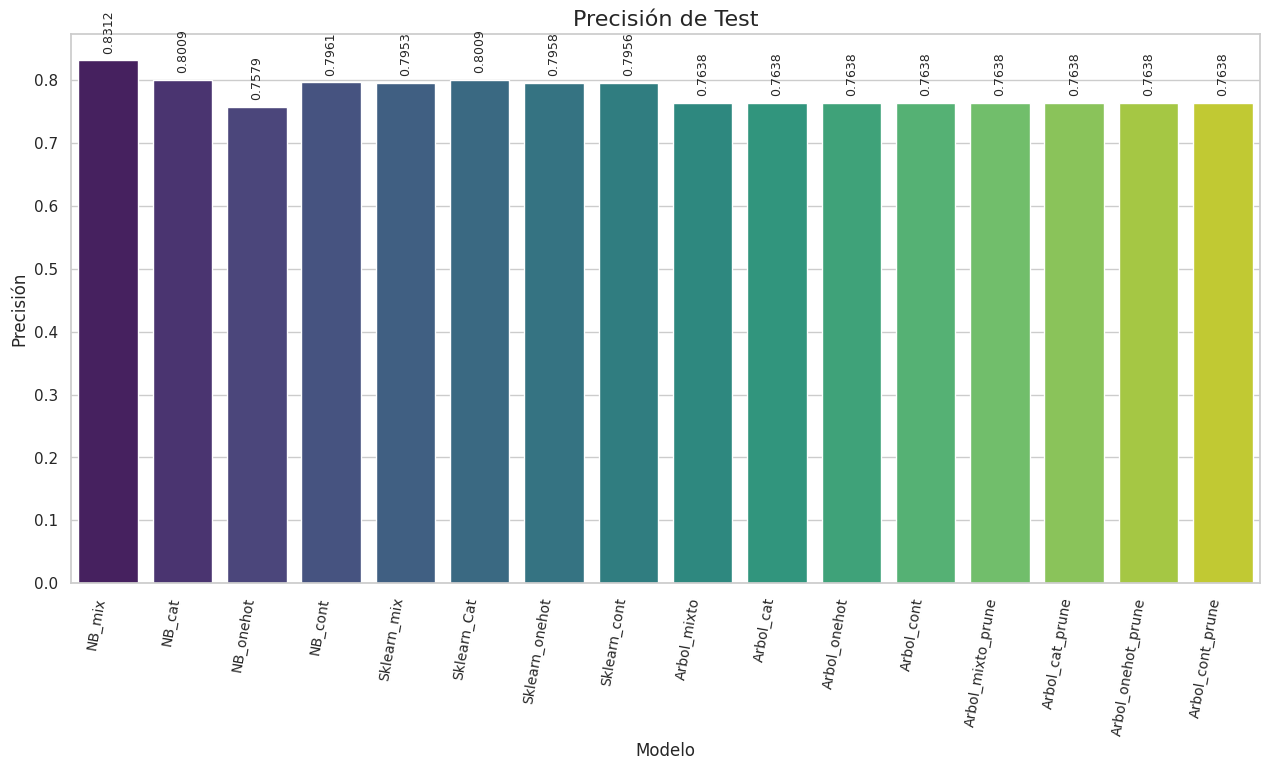

/tmp/ipykernel_6800/2210064577.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Modelo', y=columna_metrica, data=results_df, palette='viridis')


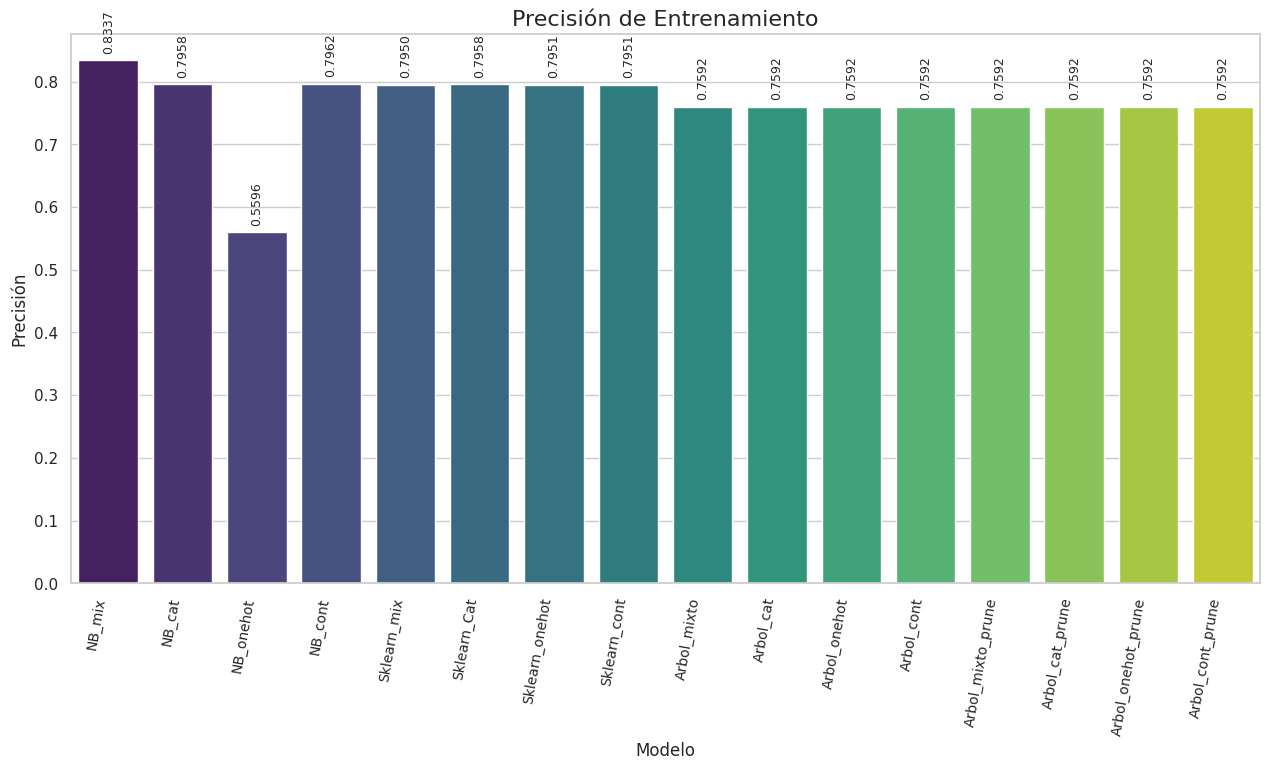

/tmp/ipykernel_6800/2210064577.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Modelo', y=columna_metrica, data=results_df, palette='viridis')


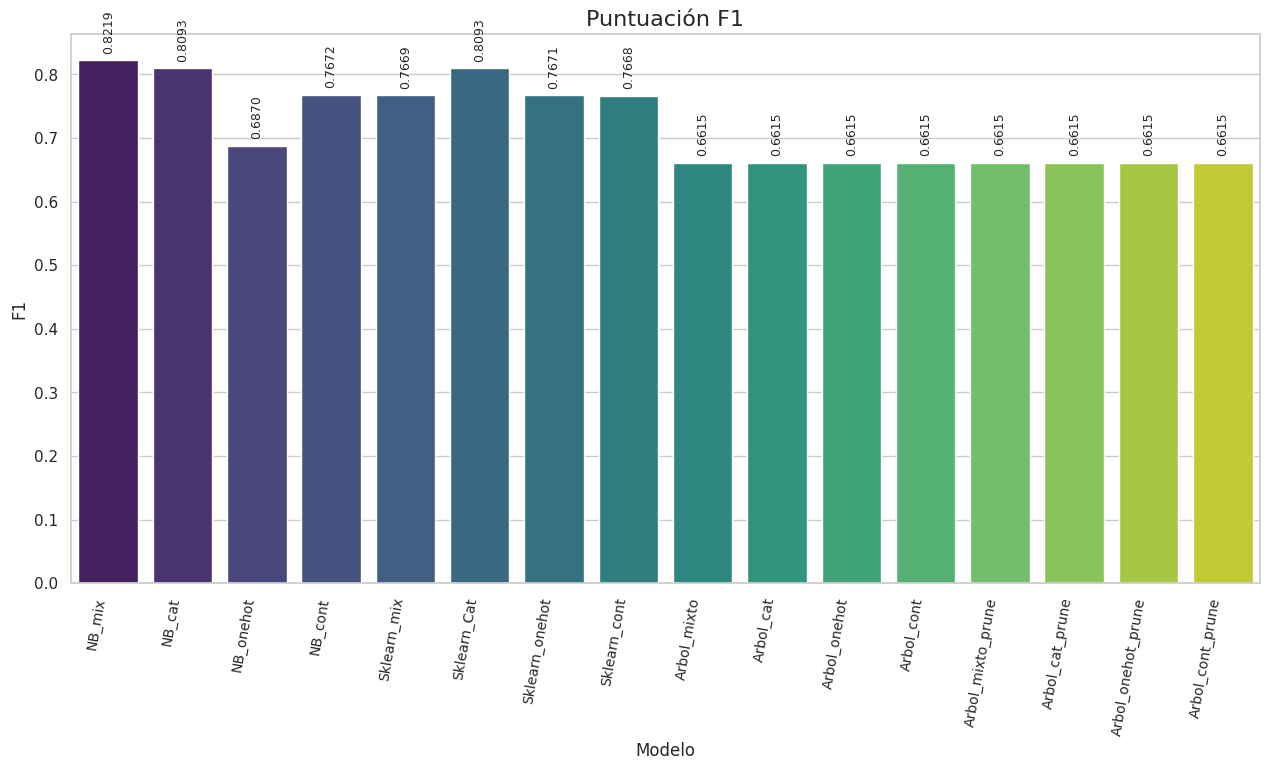

/tmp/ipykernel_6800/2210064577.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Modelo', y=columna_metrica, data=results_df, palette='viridis')


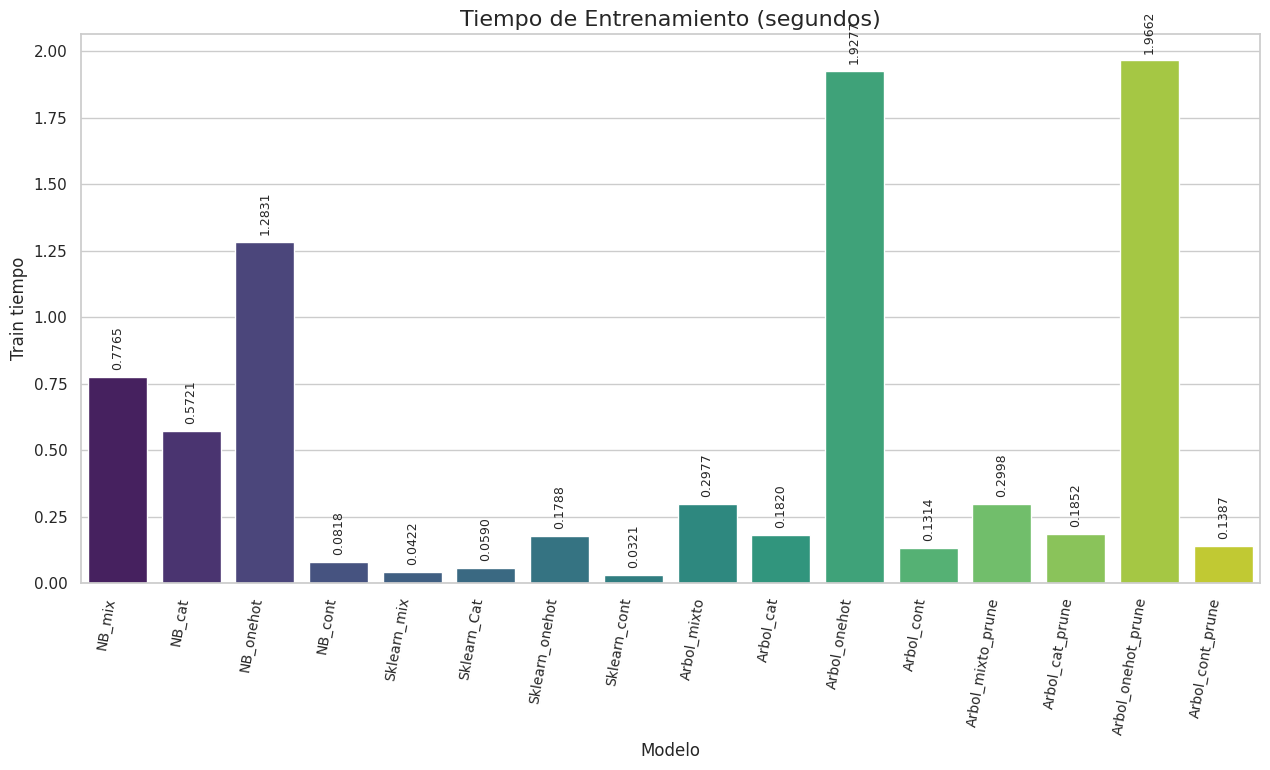

/tmp/ipykernel_6800/2210064577.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Modelo', y=columna_metrica, data=results_df, palette='viridis')


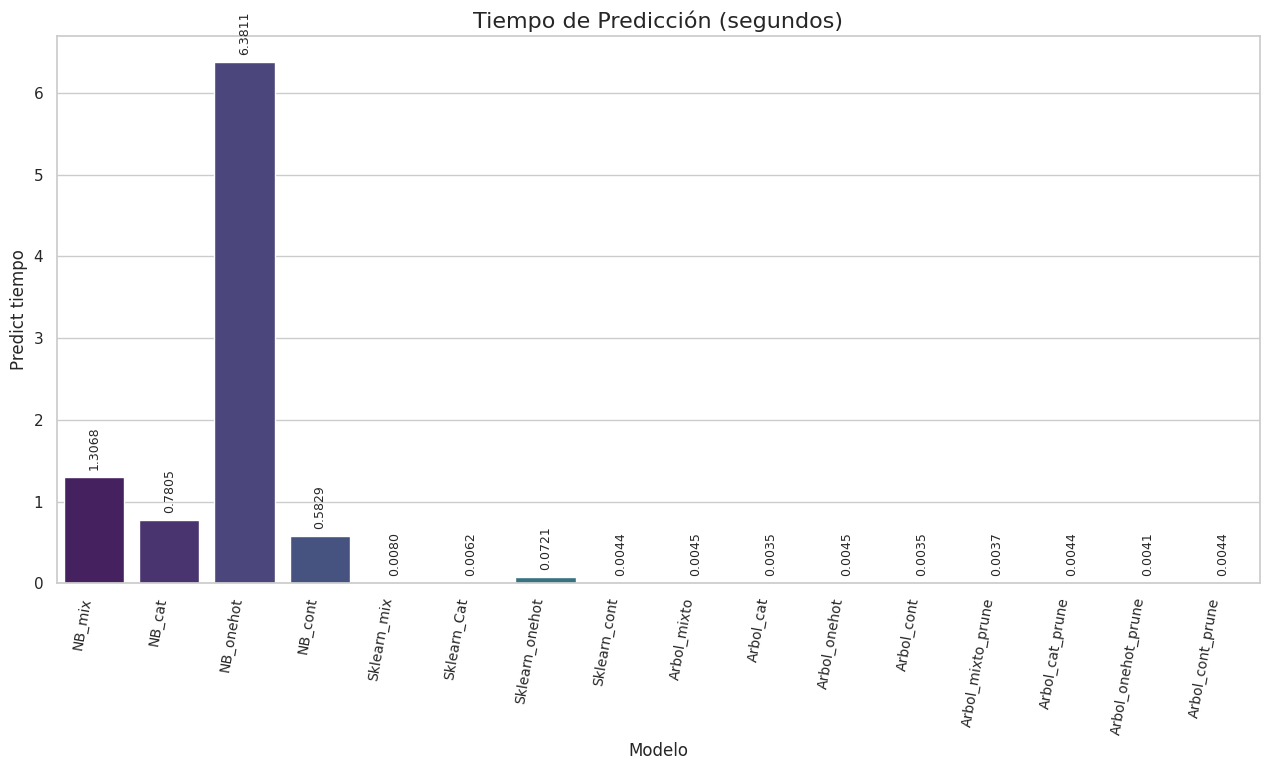

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns

graficas = {
    'Precisión (Test)': 'Precisión de Test',
    'Precisión (Train)': 'Precisión de Entrenamiento',
    'F1 (Test)': 'Puntuación F1',
    'Train tiempo (s)': 'Tiempo de Entrenamiento (segundos)',
    'Predict tiempo (s)': 'Tiempo de Predicción (segundos)'
}

sns.set_theme(style="whitegrid")

for columna_metrica, titulo_grafica in graficas.items():
    plt.figure(figsize=(13, 8))
    
    barplot = sns.barplot(x='Modelo', y=columna_metrica, data=results_df, palette='viridis')
    
    plt.title(titulo_grafica, fontsize=16)
    plt.xlabel('Modelo', fontsize=12)
    plt.ylabel(columna_metrica.split('(')[0].strip(), fontsize=12) 
    plt.xticks(rotation=80, ha='right', fontsize=10) 
    
    try:
      for container in barplot.containers:
          barplot.bar_label(container, fmt='%.4f', rotation=90, padding=5, fontsize=9)
    except Exception as e:
        print(f"No se pudieron añadir etiquetas a las barras para '{titulo_grafica}'. Error: {e}")

    plt.tight_layout(pad=1.5) 
    

    plt.show()

### Conclusiones

Gracias a esta practica, nuestro conocimiento sobre el modelo naive bayes ha aumentado, lo que nos ayudará a en futuros ejercicios, examenes o incluso aplicaciones reales. Lo más complicado de esta practica ha sido estructurar bien todas las tablas y sobre todo hacer que las probabilidades se mostraran de forma correcta. 